# 💰💰 Sales Trends Analysis

## 🎯 Objectives

This notebook explores sales and revenue trends in the e-commerce dataset. The main goals are to:

- Analyze revenue and order trends over time (monthly, quarterly)
- Identify seasonal peaks
- Track performance across regions
- Track performance by product and customer demographics

## 📦 Data Source

The data used here is the cleaned version of the original sales dataset:
- File: `../data/cleaned_orders.csv`
- Format: CSV
- Rows represent individual product orders with associated customer and order details.

## 📊 Data Loading

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv("../data/cleaned_orders.csv")
df.shape
# df.info()

(810, 18)

In [22]:
# Check for nulls
# df.isna().sum()

In [4]:
df_copy = df.copy()

## Analysis

In this section, the impact of different features of the data on sales and revenue would be considered. Revenue trends, order trends and shipment trends by product and region would also be reviewed. Different factors that may affect revenue and delivery would be tackled.

### Overview of Sales Trends

In [4]:
# Reset Order Date field to Datetime
df_copy["Order Date"] = pd.to_datetime(df["Order Date"])
df_copy["Order Date"].head()

0   2023-04-09
1   2023-08-28
2   2023-01-18
3   2023-01-11
4   2023-10-23
Name: Order Date, dtype: datetime64[ns]

In [5]:
# Extract Sales Trends Data
sales_trends = df_copy.set_index("Order Date")["Total Price Calc"].rename("Sales Trends").sort_index()
sales_trends.head()

Order Date
2023-01-01     500.0
2023-01-02    1200.0
2023-01-03     800.0
2023-01-03     600.0
2023-01-03      30.0
Name: Sales Trends, dtype: float64

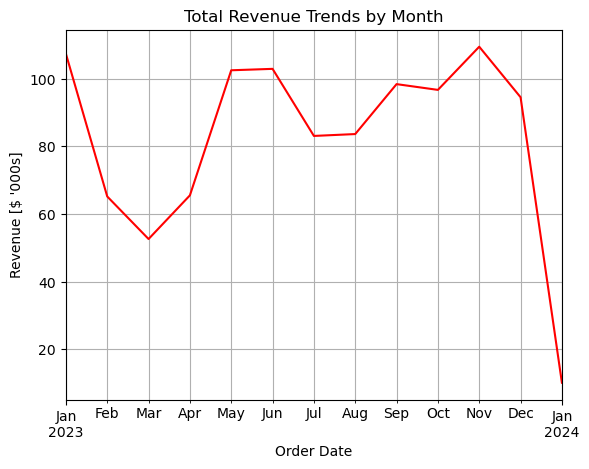

In [12]:
# Plot Total Revenue by Month 
(sales_trends.resample("1ME").sum() / 1e3).plot(kind='line', color="red")
plt.grid(which="both")
plt.ylabel("Revenue [$ '000s]")
plt.title("Total Revenue Trends by Month")
plt.show();

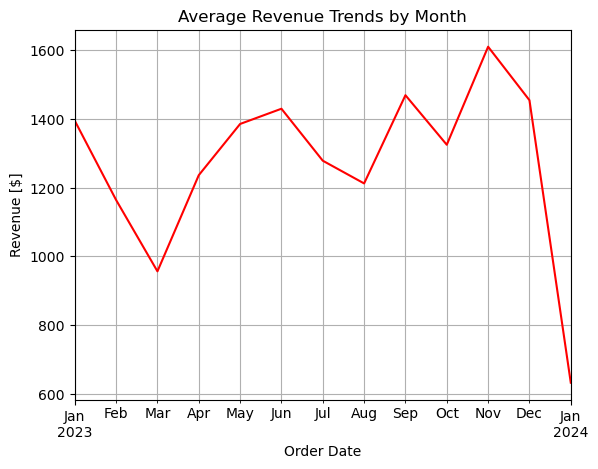

In [ ]:
# Plot Average Revenue by Month 
(sales_trends.resample("1ME").mean()).plot(kind='line', color="red")
plt.grid(which="both")
plt.ylabel("Revenue [$]")
plt.title("Average Revenue Trends by Month")
plt.show();

The trends for both the average and total revenues per month reflect very similar patterns: `Decreases from Jan to March`, then `increase until June`, `decreases until August` and fluctuating monthly afterwards until it reaches an `all time high in November`.

Now, let's plot quarterly revenues to better understand the data.

##### Quarterly Revenue trends

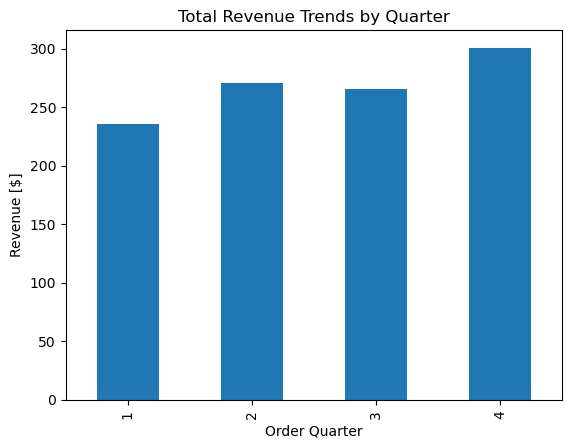

In [ ]:
# Plot Total Revenue by Quarter
((df_copy.groupby(by="Order Quarter")["Total Price Calc"].sum() / 1e3)
    .plot(kind="bar")
)
plt.ylabel("Revenue [$ '000s]")
plt.title("Total Revenue Trends by Quarter")
plt.show();

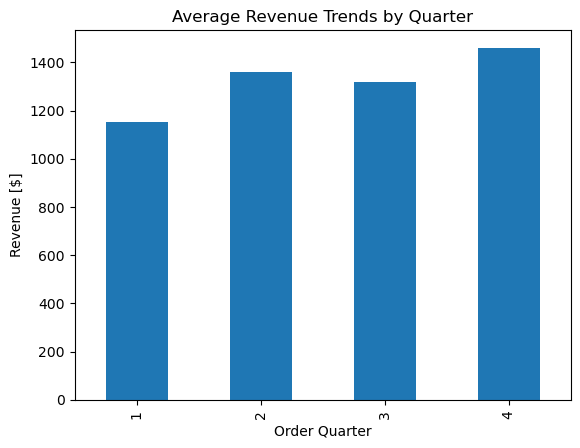

In [35]:
# Plot Average Revenue by Quarter
(df_copy.groupby(by="Order Quarter")["Total Price Calc"].mean()
    .plot(kind="bar")
)
plt.ylabel("Revenue [$]")
plt.title("Average Revenue Trends by Quarter")
plt.show();

Both the total and average revenue quarterly plots reveal the same pattern for revenue over the period. Revenue is lowest in Q1, then increaes in Q2, then decreases in Q3 and peaks at Q4. This shows that the `most profitable periods` of the year `are Q2 and Q4` (particularly in November where revenue peaks).

### Order Trends

Although the most profitable quarters have been identified to be Q2 and Q4 and most profitable month as November, we proceed to analyze order trends, to allow us further perspective on the findings.

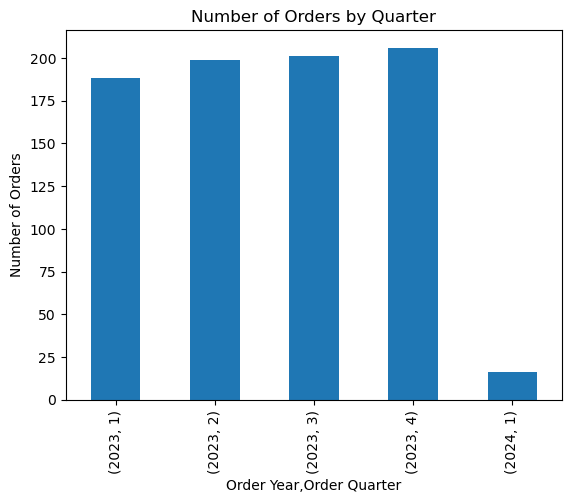

In [48]:
# Plot number of orders per quarter
df_copy.groupby(["Order Year","Order Quarter"]).size().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Quarter")
plt.show();

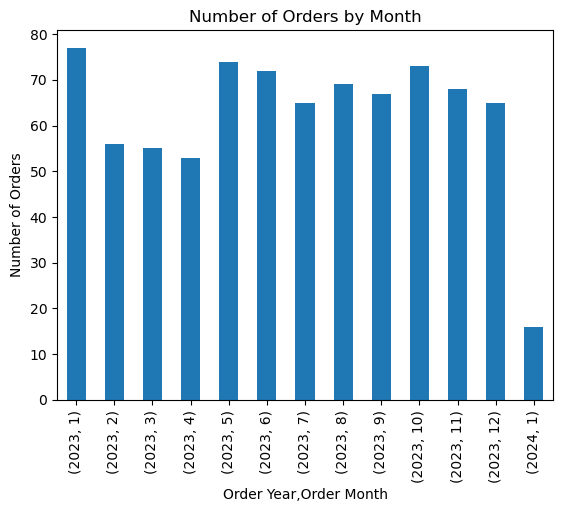

In [50]:
# Plot number of orders per month
df_copy.groupby(by=["Order Year", "Order Month"]).size().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Month")
plt.show();

Number of orders increases consistently every quarter, whilst the monthly trends show major fluctuations. Per month, both Q1 and Q3 show decreasing number of orders from the first month to the third, and this is very pronounced in the first quarter. Interestingly, `November` which records the highest revenue does not have the highest number of orders. This may indicate that products sold in this month may have higher price since a smaller number of orders was needed to reach the peak revenue.

Specific months in different quarters would be explored to reveal further insights.

### Regional Performance

In [ ]:
df.groupby(by=["Order Month", "Region"])["Total Price Calc"].sum().unstack().plot(kind="line")
plt.ylabel("Revenue [$]")
plt.title("Monthly Revenue Trends by Region")
plt.show()

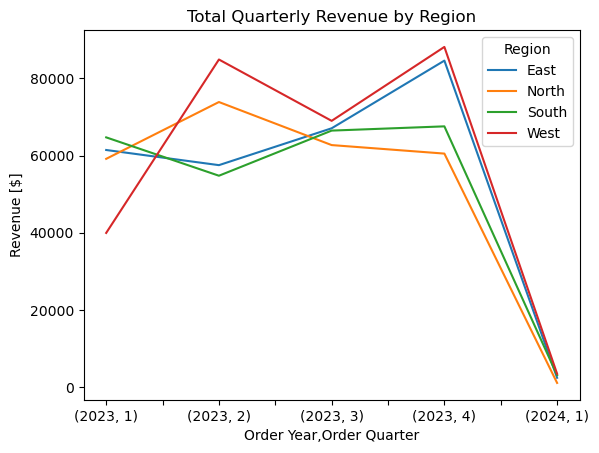

In [8]:
# Plot Total Revenue every Quarter by Region
(df_copy.groupby(by=["Order Year", "Order Quarter", "Region"])["Total Price Calc"].sum()
    .unstack()
    .plot(kind="line")
)
plt.ylabel("Revenue [$]")
plt.title("Total Quarterly Revenue by Region")
plt.show();

While `Total Number of Orders increase every quarter` as shown in previous visualizations, the same trends do not hold regionally. The East and South regions start with highest revenues for Q1, but then decline in the next quarter. The other 2 regions start with the lowest for Q1 but obtain the highest revenues for Q2.

For the first 3 quarters of the year, the two groups (East and South - G1, and West and North - G2) `display alternating trends in revenues` such that when the revenue for one group rises, the other decreases.

However, `for Q4, all regions (except North) record their peak revenues for the year`, indicating profitability in such regions in the fourth quarter. In 2023 for instance, the North region experienced one of its lowest revenues and thus, it is advised to spend less on products in the North region during the fourth quarter.

Let's see how these trends hold with average revenues for each region.

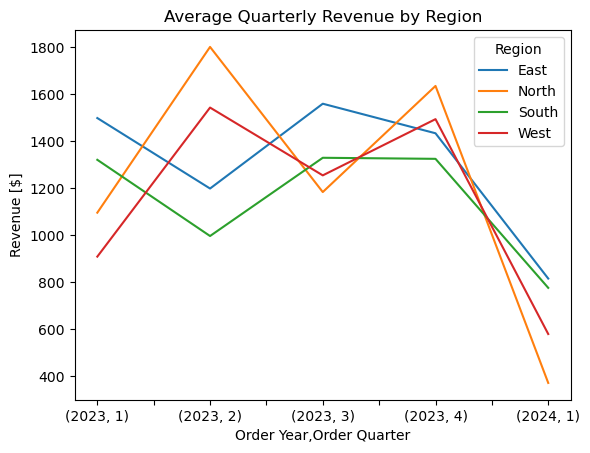

In [9]:
# Plot Average Revenue every Quarter by Region
(df_copy.groupby(by=["Order Year", "Order Quarter", "Region"])["Total Price Calc"].mean()
    .unstack()
    .plot(kind="line")
)
plt.ylabel("Revenue [$]")
plt.title("Average Quarterly Revenue by Region")
plt.show()

The alternating patterns of revenue for G1 and G2 (these groups have been previously explained) further confirm the findings from the previous visualization. Again, the G1 regions recorded the lowest average revenues for Q2 (and for the year 2023). As such, these conclusions can be drawn.

1. The least profitable quarters regionally are Q2 (for G1 regions) and Q1 (for G2 regions). This means that, we can prioritize the distribution of products to be sold quarterly to maximize profits and reduce losses.

1. The most profitable quarters regionally are Q2 and Q4 (for G2 regions) and Q3 (for G1 regions). Thus, we can target different regions in different periods to boost profits.

### Performance by Customer Demographics

#### Sales Performance by Gender

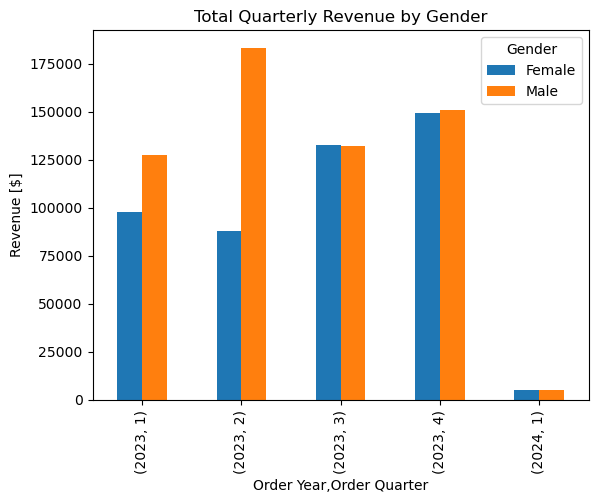

In [23]:
# Plot Total Quarterly Revenues by Gender
(df_copy.groupby(by=["Order Year", "Order Quarter", "Gender"])["Total Price Calc"].sum()
    # .head()
    .unstack()
    .plot(kind="bar")
)
plt.ylabel("Revenue [$]")
plt.title("Total Quarterly Revenue by Gender")
plt.show();

In all quarters generally, `Male`s recorded more revenue than `Female`s, and is more pronounced in the second quarter. Let's proceed to see how these findings hold for average revenues.

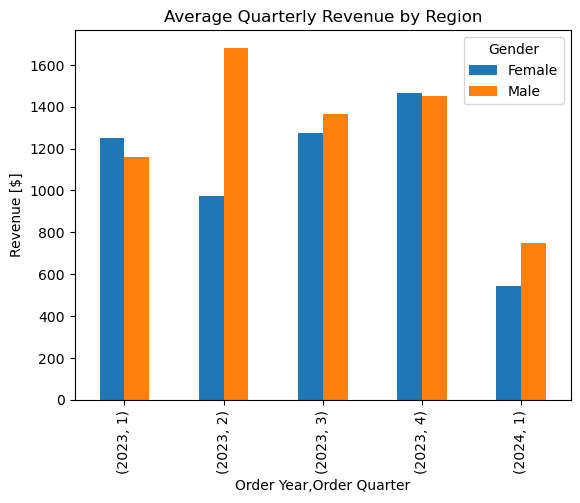

In [24]:
# Plot Average Quarterly Revenue by Gender
(df_copy.groupby(by=["Order Year", "Order Quarter", "Gender"])["Total Price Calc"].mean()
    .unstack()
    .plot(kind="bar")
)
plt.ylabel("Revenue [$]")
plt.title("Average Quarterly Revenue by Region")
plt.show();

The previous findings still hold, except that in Q1 and Q4 of 2023, the average revenue from Females was slightly larger than that of Males. This means although `women spent more on average` in Q1 and Q4, more revenue was recorded from Males due to a larger number of orders.

Let's explore monthly patterns as well.

<Axes: xlabel='Order Year,Order Month'>

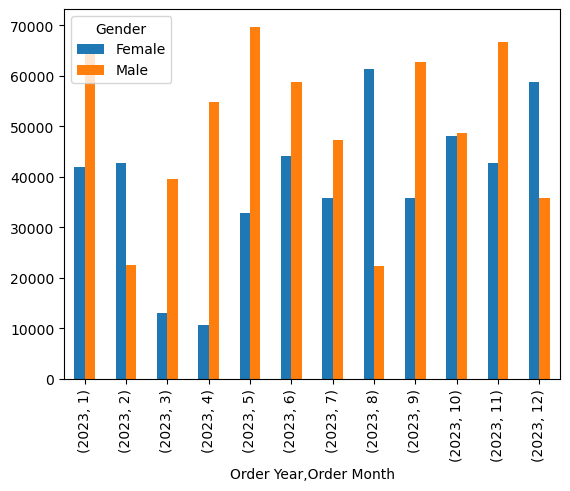

In [26]:
mask_year = df_copy["Order Year"] == 2023
df_2023 = df_copy[mask_year]
(df_2023.groupby(by=["Order Year", "Order Month", "Gender"])["Total Price Calc"].sum()
    .unstack()
    .plot(kind="bar")
)

With the exception of `October where Females generated almost as much revenues as Males did`, all other month showed wide revenue gaps between Males and Females.`Females generated more income in the months of February, August, and December` whilst Males generated more revenue in all other months. For instance, in the months of March, April and May, revenues generated from `Males was more than 50%` that generated from Females.

This shows an opportunity to leverage on the different kinds of products that Males and Females are most likely to buy, ensuring the right products are made available for both Males and Females at different times of the year.

Let's first look into months where females generated more revenues than males and the kinds of products bought

##### Deeper dive into February, August and December

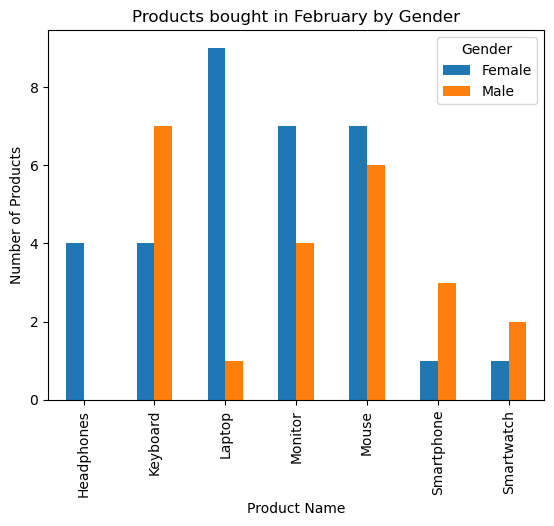

In [59]:
# Products bought in February
mask_month = df_2023["Order Month"] == 2
df_2023[mask_month].groupby(["Product Name", "Gender"]).size().unstack().plot(kind="bar")
plt.title("Products bought in February by Gender")
plt.ylabel("Number of Products")
plt.show();


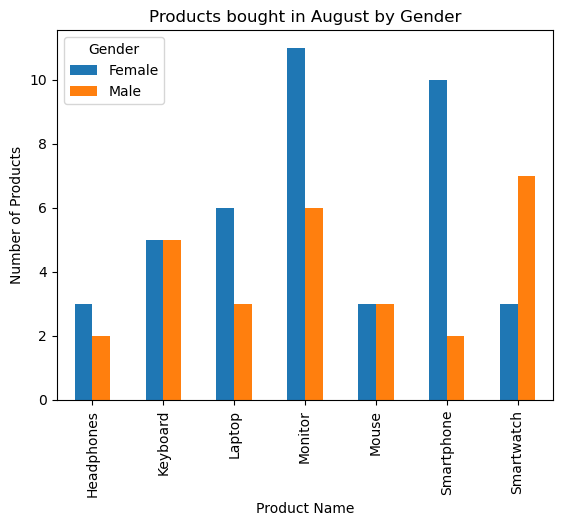

In [60]:
# Products bought in August
mask_month = df_2023["Order Month"] == 8
df_2023[mask_month].groupby(["Product Name", "Gender"]).size().unstack().plot(kind="bar")
plt.title("Products bought in August by Gender")
plt.ylabel("Number of Products")
plt.show();

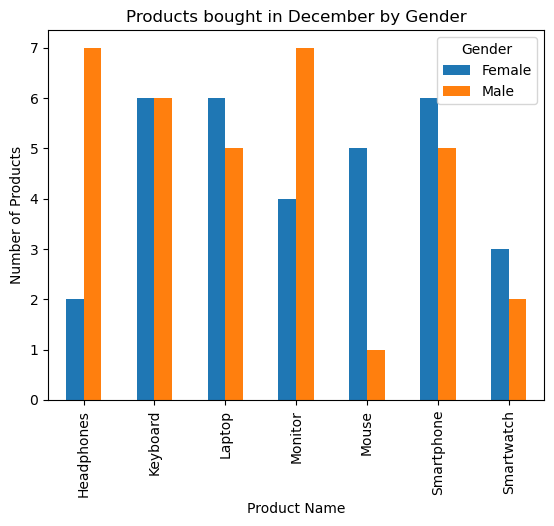

In [61]:
# Products bought in December
mask_month = df_2023["Order Month"] == 12
df_2023[mask_month].groupby(["Product Name", "Gender"]).size().unstack().plot(kind="bar")
plt.title("Products bought in December by Gender")
plt.ylabel("Number of Products")
plt.show();

Female orders over the months of February, August and December of 2023 showed very interesting patterns. `Laptops` were consistently ordered in these months with February and December recording the largest of these orders. In August, the demand for laptops would drop and more females would order Monitor and Smartphone. Overall, Females ordered `Laptops, Monitors, Mouse, Smartphones and Keyboards`.

In these periods, `male orders were significantly lower` than Females `except for Keyboard` (in February), `Smartwatch` (in August) and `Headphones and Monitors` (in December)

##### Deeper dive into remaining months

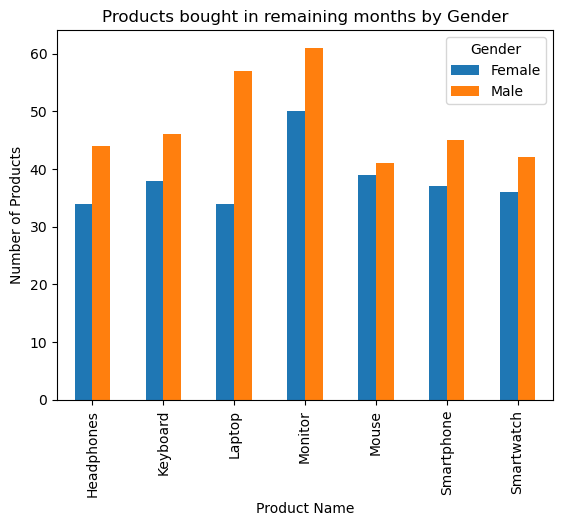

In [69]:
# Plot Products bought by Gender in other remaining months
mask_month = df_2023["Order Month"].isin([1,3,4,5,6,7,9,10,11])
df_2023[mask_month].groupby(["Product Name", "Gender"]).size().unstack().plot(kind="bar")
plt.title("Products bought in remaining months by Gender")
plt.ylabel("Number of Products")
plt.show();

Overall, in the remaining months, Males ordered more of every product than Females in months other than February, August and December. Products most ordered were `Monitor` and `Laptop`, indicating their profitablity all year round.

#### Sales Performance by Age Group

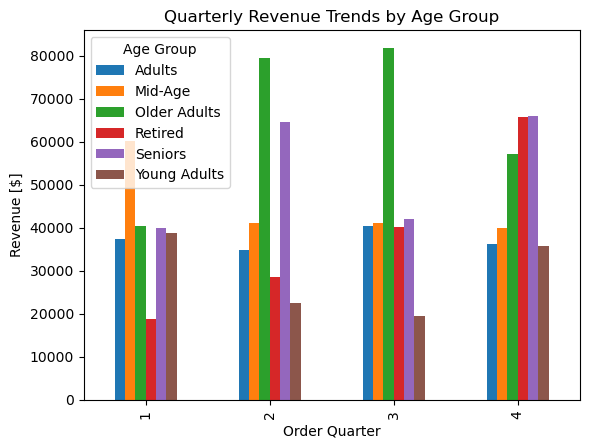

In [107]:
# Plot revenue trends by Age group for each quarter
(df_copy.groupby(by=["Order Quarter","Age Group"])["Total Price Calc"].sum()
    .unstack()
    .plot(kind="bar")
)
plt.title("Quarterly Revenue Trends by Age Group")
plt.ylabel("Revenue [$]")
plt.show();

In [98]:
df_copy.groupby(by=["Order Quarter","Age Group"])["Total Price Calc"].sum().unstack()

Age Group,Adults,Mid-Age,Older Adults,Retired,Seniors,Young Adults
Order Quarter,,,,,,
1,37403.824245,60040.000000,40347.304041,18790.0,39919.055866,38840.0
2,34880.000000,41089.905062,79439.275797,28620.0,64539.560612,22410.0
3,40450.000000,41200.000000,81790.000000,40050.0,42105.124755,19580.0
4,36210.000000,39970.000000,57094.857592,65790.0,65970.000000,35700.0


Each quarter generally reveal interesting patterns about the demographics of customers within the periods. `Older Adults` generate the most income, particularly in `Q2` and `Q3`.

For the first quarter (Q1), revenues from each of the age groups are generally low except for `Mid-Age` which records its highest revenue for the year. Afterwards, the revenue generated by this group decreases, never crossing the $40,000 mark. A similar trend is observed for the `Young Adults` except that the peak values are slightly lower.

The revenue from the `Seniors` group fluctuates but records sharp rises in the second and fourth quarters. That obtained from the `Retired` age group increases every quarter, peaking beyond $65,000 in the final quarter.

The total revenue from `Adults` alternates; showing an increase in one quarter and a decrease in the next. This provides an understanding of what groups of customers to target in different quarters.

##### Further Analysis into Age groupings

Let's group the different age groups into two distinct groups, based on their total revenue generated. This should allow for easier analysis.

In [ ]:
# Obtain total revenues by Age group
df_copy.groupby(by=["Age Group"])["Total Price Calc"].sum().sort_values()

Age Group
Young Adults    116530.000000
Adults          148943.824245
Retired         153250.000000
Mid-Age         182299.905062
Seniors         212533.741233
Older Adults    258671.437431
Name: Total Price Calc, dtype: float64

We therefore create 2 groups: `Group A (Young Adults, Adults, Retired)` and `Group B (Mid-Age, Seniors, Older Adults)`. Monthly revenues and different products bought by each of these groups are analyzed next.

In [5]:
# Dividing the data into 2 groups
# Creating masks for division
mask_A = df_copy["Age Group"].isin(["Young Adults", "Adults", "Retired"])
mask_B = df_copy["Age Group"].isin(["Mid-Age", "Seniors", "Older Adults"])

# Applying the masks
df_group_A = df_copy[mask_A]
df_group_B = df_copy[mask_B]

##### Analysis for Group A

Number of Orders

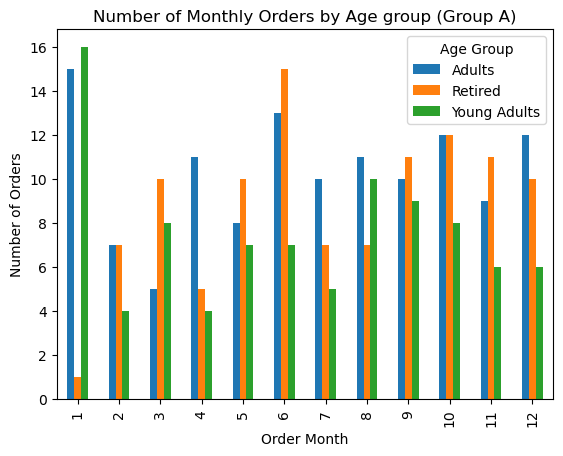

In [10]:
# Plot Number of Orders Per Month
(df_group_A
    .groupby(by=["Order Month","Age Group"])["Total Price Calc"]
    .size()
    .sort_values()
    .unstack()
    .plot(kind="bar")
)
plt.ylabel("Number of Orders")
plt.title("Number of Monthly Orders by Age group (Group A)")
plt.show();

Number of orders from Group A members reveal an interesting pattern here. Although most of the orders were in January (the most), June, October and December, most Adults and Young Adults showed highest activity in January.

For `Adults`, their activity after January decreased until increased again in June, after there were `not more than 11 orders in a month`. `Retired` people start of the year with barely any orders, then slowly `increase to a peak of 15 orders in June`, after which orders show sharply decrease, and slowly increases to `another peak in October`. `Young Adults` after ordering the highest in January, show alternating patterns of increase and decrease monthly, until August, after which orders slowly reduced to 5 at the end of the year.

Overall orders by `Group A` members are mostly in January (by Adults and Young Adults), June (by Retired) and also in the months of August, October and December. This gives us insights into how to target each of these age groups and when.

Different Products Ordered

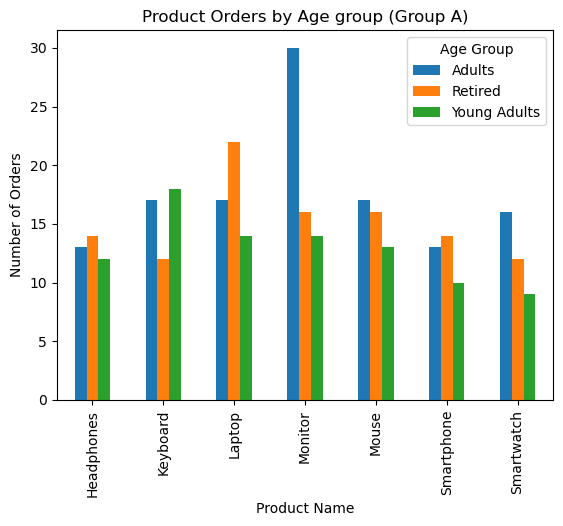

In [11]:
# Plot Products Ordered by Age group
(df_group_A
 .groupby(by=["Product Name", "Age Group"])
 .size()
 .unstack()
 .plot(kind="bar")
)
plt.ylabel("Number of Orders")
plt.title("Product Orders by Age group (Group A)")
plt.show();

It is very noticeable, that Adults prefer `Monitor` over other products with `30 monitor orders` for the period. `Young Adults show preference for all the different products`, with a few more customers preferring `Keyboards`. For `Retired` group, `Laptops` are their target product, with more than 20 laptop orders for the period.

##### Analysis for Group B

Number of Orders

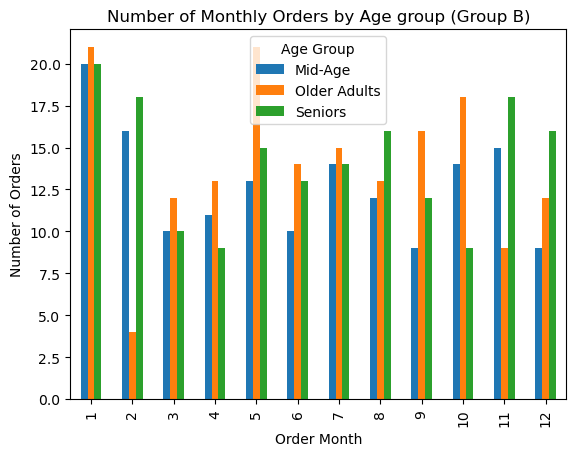

In [9]:
# Plot Number of Orders Per Month
(df_group_B
    .groupby(by=["Order Month","Age Group"])["Total Price Calc"]
    .size()
    .sort_values()
    .unstack()
    .plot(kind="bar")
)
plt.ylabel("Number of Orders")
plt.title("Number of Monthly Orders by Age group (Group B)")
plt.show();

Different Products Ordered

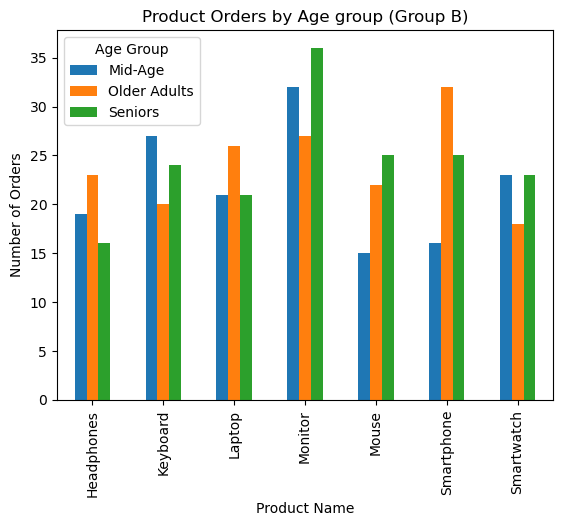

In [8]:
# Plot Products Ordered by Age group
(df_group_B
 .groupby(by=["Product Name", "Age Group"])
 .size()
 .unstack()
 .plot(kind="bar")
)
plt.ylabel("Number of Orders")
plt.title("Product Orders by Age group (Group B)")
plt.show();

## 📌Summary of Insights

## 📝 Usage Information

This notebook is open for educational and non-commercial use.
Feel free to reuse, modify, or reference this work as part of your learning or projects.